In [43]:
import random
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np

In [44]:
#creating the deck
deck = []
for i in range (1,11):
    for j in range (1, 5):
        deck.append(i)

print(deck)
len(deck)
#the deck has been created

[1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10]


40

In [45]:
#a simple, optimized and unbiased function to shuffle the deck
def shuffle_deck(deck:list):
    random.shuffle(deck)
    return deck

In [46]:
#one game simulation
def game(deck):
    game_won = True
    match_num = 1
    deck = shuffle_deck(deck)
    for i in range (len(deck)):
        if deck[i] == match_num:
            game_won = False
            break
        match_num = (match_num + 1)%4
        if match_num == 0: match_num = 1
    return (game_won, i)

In [51]:
#simulating games over 10000 iterations
all_data = []

for i in range (10000):
    times_tried = 1
    won, card_number = game(deck)
    sum_i = card_number
    num_i = 1
    max_i = min_i = card_number
    while won == False:
        times_tried +=1
        won, card_number = game(deck)
        num_i +=1
        sum_i += card_number
        if card_number>max_i:
            max_i = card_number
        if card_number<min_i:
            min_i = card_number
    data = {'attempts': times_tried, 'max_i': max_i, 'min_i': min_i, 'avg_i': (sum_i/num_i)}
    all_data.append(data)
    
df = pd.DataFrame(all_data)
df.to_csv('game_attempts_data.csv', index = False)

    

In [48]:
print(df)

      attempts  max_i  min_i     avg_i
0          450     39      0  8.884444
1           82     39      0  7.731707
2           24     39      0  9.375000
3          274     39      0  7.718978
4           10     39      1  7.900000
...        ...    ...    ...       ...
9995       175     39      0  8.754286
9996       245     39      0  8.404082
9997       219     39      0  8.429224
9998       154     39      0  8.785714
9999       111     39      0  8.747748

[10000 rows x 4 columns]


average number of attempts = 121.5245
maximum number of attempts = 1197
minimum number of attempts = 1
standard deviation of attempts = 122.99478444125182
variance number of attempts = 15127.716999750002


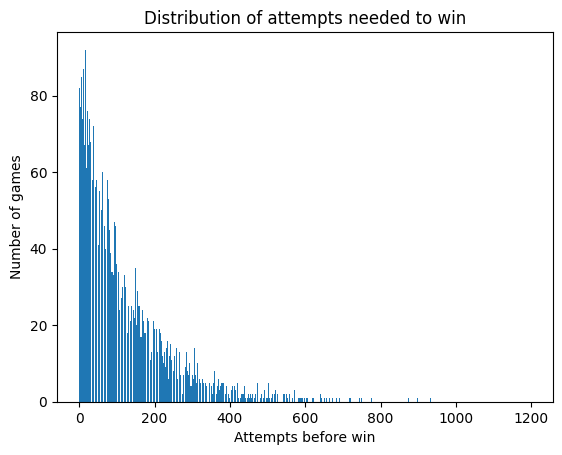

In [52]:
# Count how many times each number of attempts occurred

attempt_counts = Counter(df['attempts'])
vet = np.array(df['attempts'])
print(f'average number of attempts = {vet.mean()}')
print(f'maximum number of attempts = {vet.max()}')
print(f'minimum number of attempts = {vet.min()}')
std_attempts = vet.std()
print(f'standard deviation of attempts = {std_attempts}')
print(f'variance number of attempts = {std_attempts**2}')
# Sort by number of attempts
attempts = sorted(attempt_counts.keys())
frequencies = [attempt_counts[a] for a in attempts]

plt.bar(attempts, frequencies)
plt.xlabel('Attempts before win')
plt.ylabel('Number of games')
plt.title('Distribution of attempts needed to win')
plt.show()